<a href="https://colab.research.google.com/github/Yuvaranii/Data_Preprocessing/blob/main/Glass_Type_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np

In [56]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
data = pd.read_csv(URL, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [57]:
data.shape

(214, 11)

In [58]:
data.duplicated().value_counts()

False    214
dtype: int64

In [59]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [60]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [61]:
data.nunique()

0     214
1     178
2     142
3      94
4     118
5     133
6      65
7     143
8      34
9      32
10      6
dtype: int64

In [62]:
Columns = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
data.columns = Columns

In [63]:
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [64]:
data.drop("Id", axis = 1, inplace = True)

In [65]:
X = data[["RI",	"Na",	"Mg",	"Al",	"Si",	"K",	"Ca",	"Ba",	"Fe"]]
Y = data["glass_type"]

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
Res = knn.fit(X_train, Y_train)

In [80]:
Res.score(X_test, Y_test)

0.6976744186046512

In [81]:
from sklearn.metrics import confusion_matrix
Y_pred = knn.predict(X_test)
CM = confusion_matrix(Y_test, Y_pred)
CM

array([[10,  1,  0,  0,  0,  0],
       [ 5,  8,  0,  1,  0,  0],
       [ 1,  2,  0,  0,  0,  0],
       [ 0,  2,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  8]])

Text(33.0, 0.5, 'Truth')

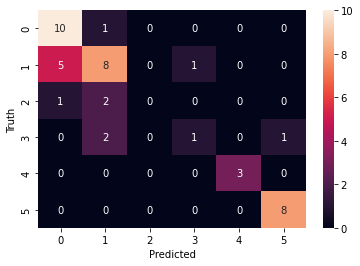

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.heatmap(CM, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

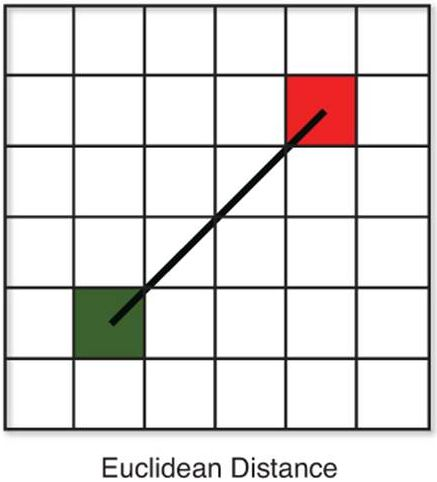

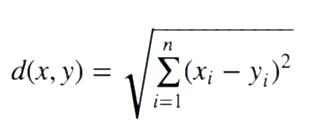

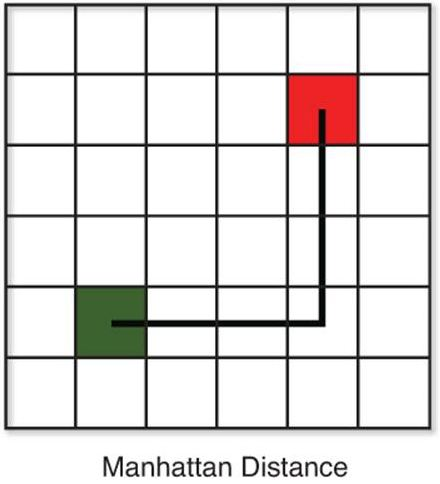

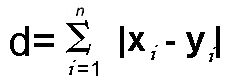

##p = 1 equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2; default=2

##Manhattan_Distance

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p = 1)
Res = knn.fit(X_train, Y_train)

In [85]:
Res.score(X_test, Y_test)

0.7906976744186046

##Euclidean_Distance

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p = 2)
Res = knn.fit(X_train, Y_train)

In [87]:
Res.score(X_test, Y_test)

0.6976744186046512